objective: 

take a network, $G$, a function $h:V(G)\rightarrow X$
We want:
* identify minima
* partition into basins
* indentify saddle points

In [1]:
import numpy as np
import networkx as nx
import math
import matplotlib
import landscapeofcomplexnetworks as lcn

In [2]:
G = nx.karate_club_graph()

In [3]:
import math
h = lcn.perturb_function(lambda x: -math.log(G.degree(x)), G.nodes())

Algorithm 1:

In [4]:
C, basin, blank_nodes = lcn.Fast_search_of_nondegenerate_critical_nodes(G,h)
for node, value in basin.items():
    G.nodes[node]['basin'] = value

In [71]:
layout = nx.spring_layout(G)

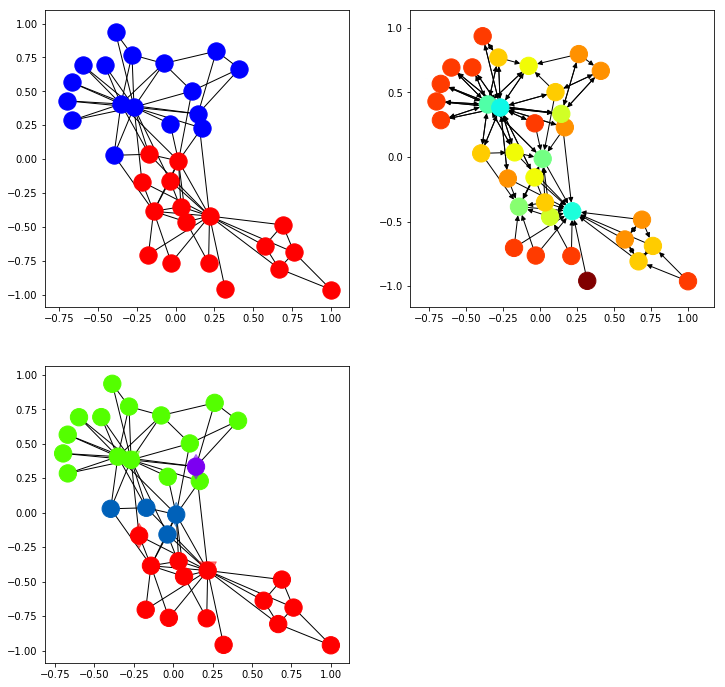

In [96]:


%matplotlib inline   
fig = matplotlib.pyplot.figure(figsize=(12,12))
ax_fast_alg = fig.add_subplot(2, 2, 3)
club_split = fig.add_subplot(2, 2, 1)
gradient = fig.add_subplot(2, 2, 2)

# draw results of algorithm
nx.draw_networkx_edges(G, pos=layout, ax=ax_fast_alg)
nx.draw_networkx_nodes(G, pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color=[v for k,v in G.nodes.data('basin')], cmap='prism',vmin=0, vmax=33, ax=ax_fast_alg)

nx.draw_networkx_nodes(G.subgraph(C[1]), pos=layout, nodesize=[h(x)*500 for x in G.subgraph(C[1]).nodes()], node_color=[v for k,v in G.subgraph(C[1]).nodes.data('basin')], node_shape='d', cmap='prism',vmin=0, vmax=33, alpha=0.5, ax=ax_fast_alg)
nx.draw_networkx_nodes(G.subgraph(C[0]), pos=layout, nodesize=[h(x)*500 for x in G.subgraph(C[0]).nodes()], node_color=[v for k,v in G.subgraph(C[0]).nodes.data('basin')], node_shape='v', cmap='prism',vmin=0, vmax=33, alpha=0.5, ax=ax_fast_alg)


# draw club split
nx.draw_networkx_edges(G, pos=layout, ax=club_split)
club1 = [node for node in G if nx.get_node_attributes(G,"club")[node] == "Mr. Hi"]
club2 = [node for node in G if nx.get_node_attributes(G,"club")[node] == "Officer"]

nx.draw_networkx_nodes(G.subgraph(club1), pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color='r', ax=club_split)
nx.draw_networkx_nodes(G.subgraph(club2), pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color='b', ax=club_split)


# Draw gradient

G_directed = nx.DiGraph(G)
for u,v in G.edges:
    if h(u)<h(v):
        G_directed.remove_edge(u,v)
G_directed.edges

nx.draw_networkx_edges(G_directed, pos=layout, ax=gradient)
nx.draw_networkx_nodes(G, pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color=[h(v) for v in G.nodes], cmap='jet', vmin=-4.5, vmax=0, ax=gradient)

In [7]:
for k, c_k in C.items():
    if c_k:
        print('C_{}:'.format(k))
        for att, val in c_k.items():
            print('critical point:', att, ', basin:', val)
        print('\n')

C_0:
critical point: 33 , basin: {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29}
critical point: 0 , basin: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 16, 17, 21}


C_1:
critical point: 2 , basin: {8, 2, 13, 30}
critical point: 31 , basin: {31}
critical point: 19 , basin: {19}


